#### All of the below is Connectivity data + feature data from one or two brain regions

In [1]:
import pandas as pd
import mne as mne
import os 
import time
import numpy as np
import matplotlib.pyplot as plt
import joblib
import constants
from IPython.utils import io
import time
import sys
import yasa
from scipy.signal import welch

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GroupShuffleSplit


from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import GroupKFold
from sklearn.metrics import accuracy_score


#Import my modules
import format_eeg_data
import constants
import eeg_stat_ts
import run_expts

#TS Fresh Parameter Settings
from tsfresh.feature_extraction import ComprehensiveFCParameters
from tsfresh.feature_extraction import MinimalFCParameters
from tsfresh.feature_extraction import EfficientFCParameters
from tsfresh.feature_extraction import extract_features

# Set the desired precision for printing
np.set_printoptions(precision=2)

/user/home/ko20929/.conda/envs/sktime_latest/lib/python3.11/site-packages/antropy/fractal.py:197: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @jit((types.Array(types.float64, 1, "C", readonly=True), types.int32))


In [2]:
region_channel_dict = constants.region_to_channel_dict
regions = list(region_channel_dict.keys())

In [3]:
np.array(mean_accs_per_region)

NameError: name 'mean_accs_per_region' is not defined

In [12]:
data_dict = joblib.load('data_dict.pkl')

tuned_clfs_dicts_loaded = joblib.load('tuned_clfs_dicts_loaded.pkl')
tuned_results_dfs_loaded = joblib.load('tuned_results_dfs_loaded.pkl')

clfs_dicts_loaded = joblib.load('non_tuned_clfs_dicts_loaded.pkl')
results_dfs_loaded = joblib.load('non_tuned_results_dfs_loaded.pkl')

dual_region_results_dfs_loaded = joblib.load('dual_region_non_tuned_results_dfs_loaded.pkl')


#### Single Region not Tuned

In [27]:
data_types = ['N1','REM', 'N2', 'N3', 'Wake']
expt_nums = [1,2]
models = ['DT', 'RF', 'Ada']

# models = ['DT', 'RF', 'Ada', 'SVC']
for data_type in data_types:
    for model in models:
        for expt_num in expt_nums:
            print(data_type + ' ' + model + ' expt_' + str(expt_num) )
            
            clf_dict = clfs_dicts_loaded[data_type + str(expt_num) + model] 
            results_df = results_dfs_loaded[data_type + str(expt_num) + model]
            
            
            mean_accs_per_region = []
            fold_accs_per_region = {}
            
            clf_name = model
            for region in regions[:13]:
                y_preds = results_df[region+ '_' + clf_name + '_y_preds'][0] + results_df[region+ '_' + clf_name + '_y_preds'][1]
                y_true = results_df['y_true'][0] + results_df['y_true'][1]
                acc_scores= [accuracy_score(y_preds, y_true) for y_preds, y_true in zip(y_preds,y_true)]
            
                fold_accs_per_region[region] = acc_scores
                
                mean_accs_per_region.append( np.array(acc_scores).mean() )
            
            mean_accs_per_region
            print(np.array(mean_accs_per_region))
            print(np.array(mean_accs_per_region).max())
            print(np.array(mean_accs_per_region).mean())

N1 DT expt_1
[0.8  0.79 0.81 0.85 0.81 0.81 0.81 0.85 0.81 0.81 0.82 0.81 0.82]
0.85
0.8173076923076922
N1 DT expt_2
[0.74 0.68 0.79 0.67 0.65 0.75 0.69 0.76 0.68 0.7  0.75 0.69 0.84]
0.8422222222222221
0.7225641025641026
N1 RF expt_1
[0.76 0.79 0.78 0.76 0.78 0.76 0.76 0.75 0.76 0.78 0.76 0.76 0.76]
0.7875
0.7663461538461538
N1 RF expt_2
[0.64 0.65 0.65 0.64 0.65 0.65 0.65 0.65 0.64 0.63 0.65 0.65 0.65]
0.6522222222222223
0.6464957264957264
N1 Ada expt_1
[0.82 0.82 0.84 0.85 0.8  0.81 0.84 0.84 0.84 0.8  0.85 0.84 0.86]
0.8625
0.8317307692307694
N1 Ada expt_2
[0.65 0.64 0.73 0.66 0.63 0.68 0.76 0.72 0.66 0.68 0.67 0.7  0.77]
0.7677777777777778
0.6888888888888888
REM DT expt_1
[0.5  0.4  0.45 0.47 0.49 0.45 0.46 0.53 0.47 0.54 0.55 0.5  0.53]
0.55
0.48749999999999993
REM DT expt_2
[0.36 0.52 0.42 0.44 0.57 0.41 0.42 0.42 0.46 0.43 0.39 0.38 0.38]
0.571111111111111
0.4321367521367521
REM RF expt_1
[0.55 0.49 0.54 0.55 0.54 0.55 0.6  0.54 0.55 0.54 0.57 0.54 0.56]
0.6
0.5471153846153846


#### Single Region Tuned

In [16]:
N1_ada_accs = all_accs_per_fold[36]

In [18]:
print(N1_ada_accs)

[0.88 1.   0.75 1.   0.88 1.   1.   0.75 0.75 0.88]


In [ ]:

tuned_clfs_dicts_loaded[data_type + str(expt_num) + model]

In [13]:
data_types = ['N1','REM', 'N2', 'N3', 'Wake']
expt_nums = [1,2]
models = ['DT', 'RF', 'Ada']

all_accs_per_fold = []

# models = ['DT', 'RF', 'Ada', 'SVC']
for data_type in data_types:
    for model in models:
        for expt_num in expt_nums:
            print(data_type + ' ' + model + ' expt_' + str(expt_num) )
            
            clf_dict = tuned_clfs_dicts_loaded[data_type + str(expt_num) + model] 
            results_df = tuned_results_dfs_loaded[data_type + str(expt_num) + model]
            
            
            mean_accs_per_region = []
            fold_accs_per_region = {}
            stds_per_region = []
            
            clf_name = model
            for region in regions[:13]:
                try:
                    y_preds = results_df[region+ '_' + clf_name + '_y_preds'][0] + results_df[region+ '_' + clf_name + '_y_preds'][1]
                    y_true = results_df['y_true'][0] + results_df['y_true'][1]
                    acc_scores= [accuracy_score(y_preds, y_true) for y_preds, y_true in zip(y_preds,y_true)]
                
                    fold_accs_per_region[region] = acc_scores
                    all_accs_per_fold.append(np.array(acc_scores))
                    mean_accs_per_region.append( np.array(acc_scores).mean() )
                    stds_per_region.append( np.array(acc_scores).std() )
                except: 
                    #Some regions not done for tuned RF (took ages, decide to focus on ADA and DT)
                    pass
            
            mean_accs_per_region
            print(np.array(mean_accs_per_region))  
            print(np.array(stds_per_region))  
            print(np.array(mean_accs_per_region).max())
            print(np.array(mean_accs_per_region).mean())

N1 DT expt_1
[0.76 0.71 0.74 0.75 0.71 0.76 0.71 0.76 0.68 0.66 0.81 0.81 0.79]
[0.14 0.11 0.13 0.24 0.13 0.14 0.18 0.13 0.14 0.22 0.13 0.13 0.14]
0.8125
0.7432692307692308
N1 DT expt_2
[0.67 0.68 0.69 0.63 0.6  0.72 0.71 0.77 0.62 0.62 0.67 0.65 0.73]
[0.14 0.21 0.17 0.2  0.15 0.14 0.16 0.08 0.14 0.18 0.18 0.13 0.15]
0.7666666666666667
0.6730769230769231
N1 RF expt_1
[0.71 0.7  0.75 0.7 ]
[0.11 0.1  0.12 0.14]
0.75
0.715625
N1 RF expt_2
[0.6  0.53 0.54 0.56]
[0.18 0.22 0.17 0.16]
0.5988888888888889
0.5588888888888889
N1 Ada expt_1
[0.81 0.82 0.89 0.81 0.85 0.82 0.8  0.82 0.88 0.79 0.86 0.82 0.85]
[0.19 0.11 0.1  0.15 0.13 0.17 0.19 0.16 0.1  0.19 0.1  0.15 0.12]
0.8875
0.8336538461538461
N1 Ada expt_2
[0.77 0.64 0.72 0.67 0.63 0.71 0.7  0.75 0.65 0.67 0.74 0.73 0.8 ]
[0.14 0.14 0.17 0.13 0.14 0.16 0.17 0.15 0.18 0.14 0.21 0.15 0.1 ]
0.7966666666666667
0.7041025641025642
REM DT expt_1
[0.49 0.53 0.46 0.46 0.5  0.42 0.54 0.51 0.49 0.47 0.49 0.51 0.46]
[0.13 0.18 0.16 0.19 0.17 0.17 0.2 

#### Plot feature importances for the N1 Ada Boost best performing model

In [54]:
# 89% accuracy on PD vs HC classification
regions[8]

'Right Temporal'

In [53]:
np.array([0.81,0.82,0.89,0.81,0.85,0.82,0.8,0.82,0.88,0.79,0.86,0.82,0.85])[8]

0.88

In [19]:
N1_ada_accs = all_accs_per_fold[36]
print(N1_ada_accs)

[0.88 1.   0.75 1.   0.88 1.   1.   0.75 0.75 0.88]


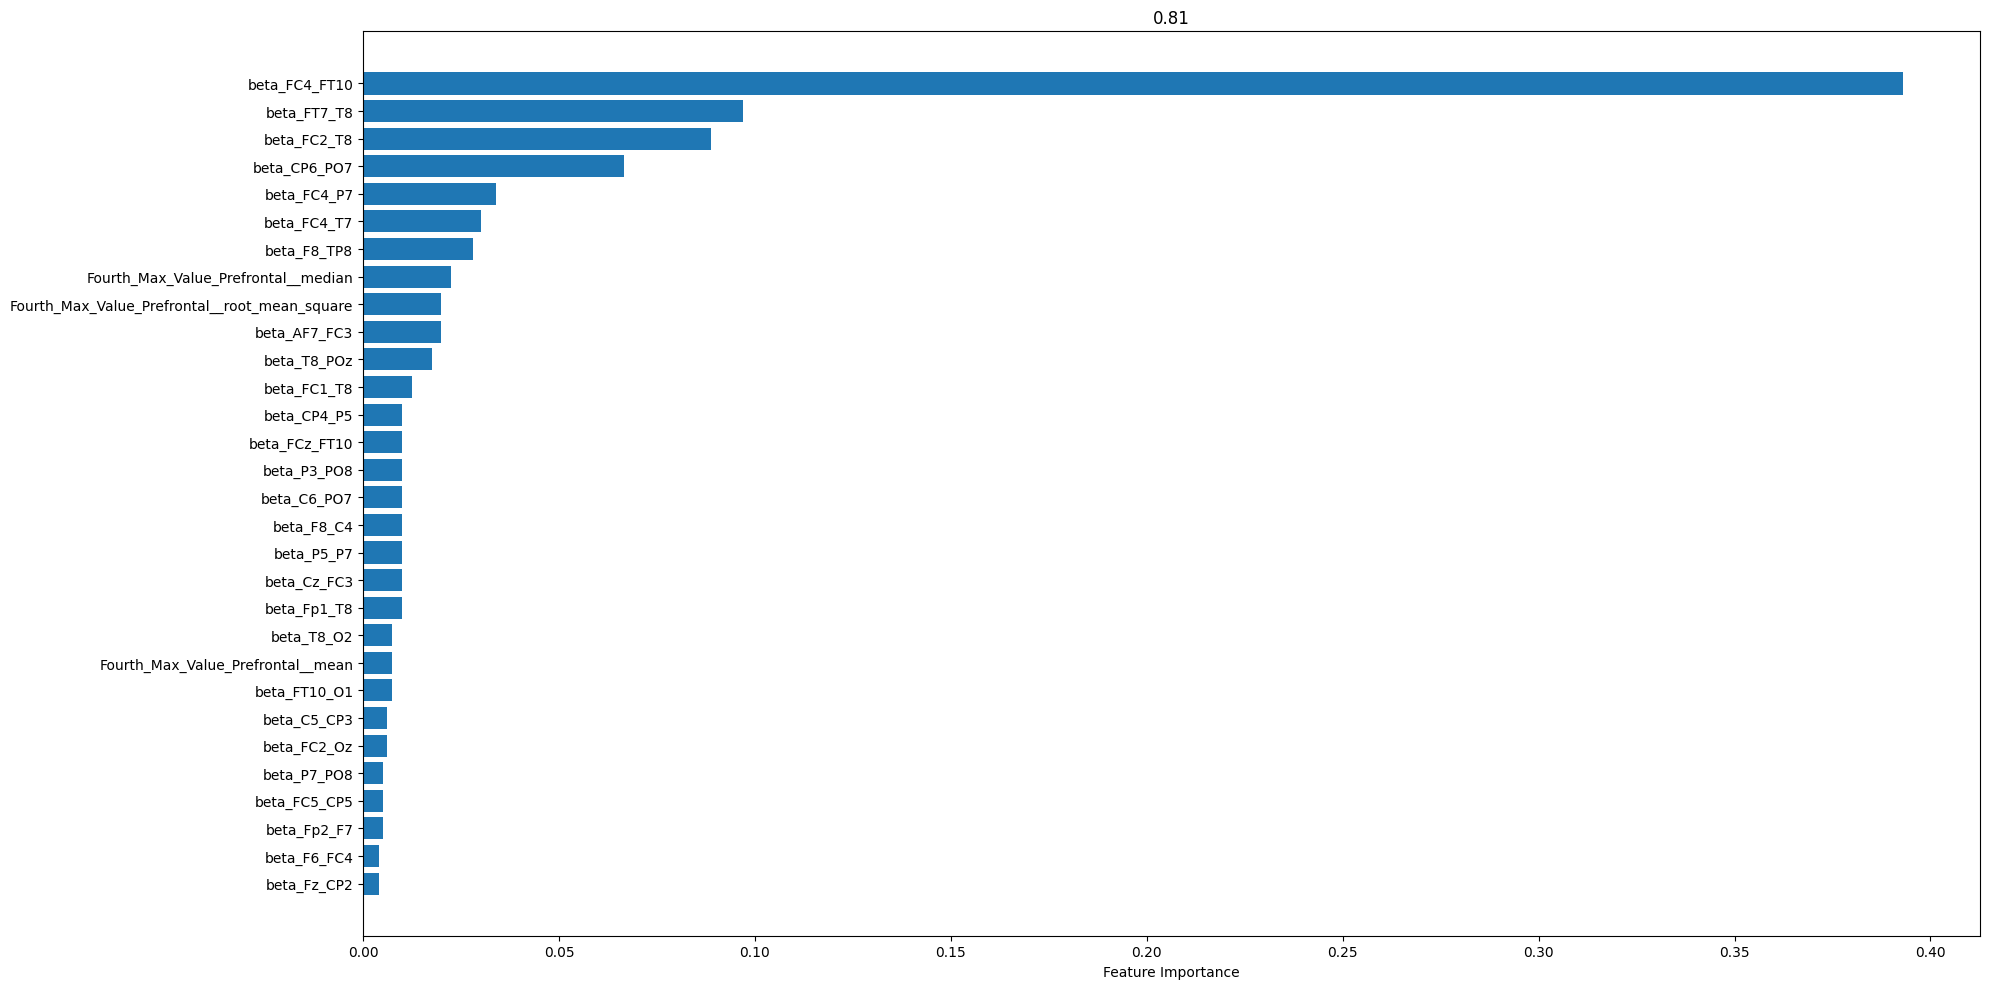

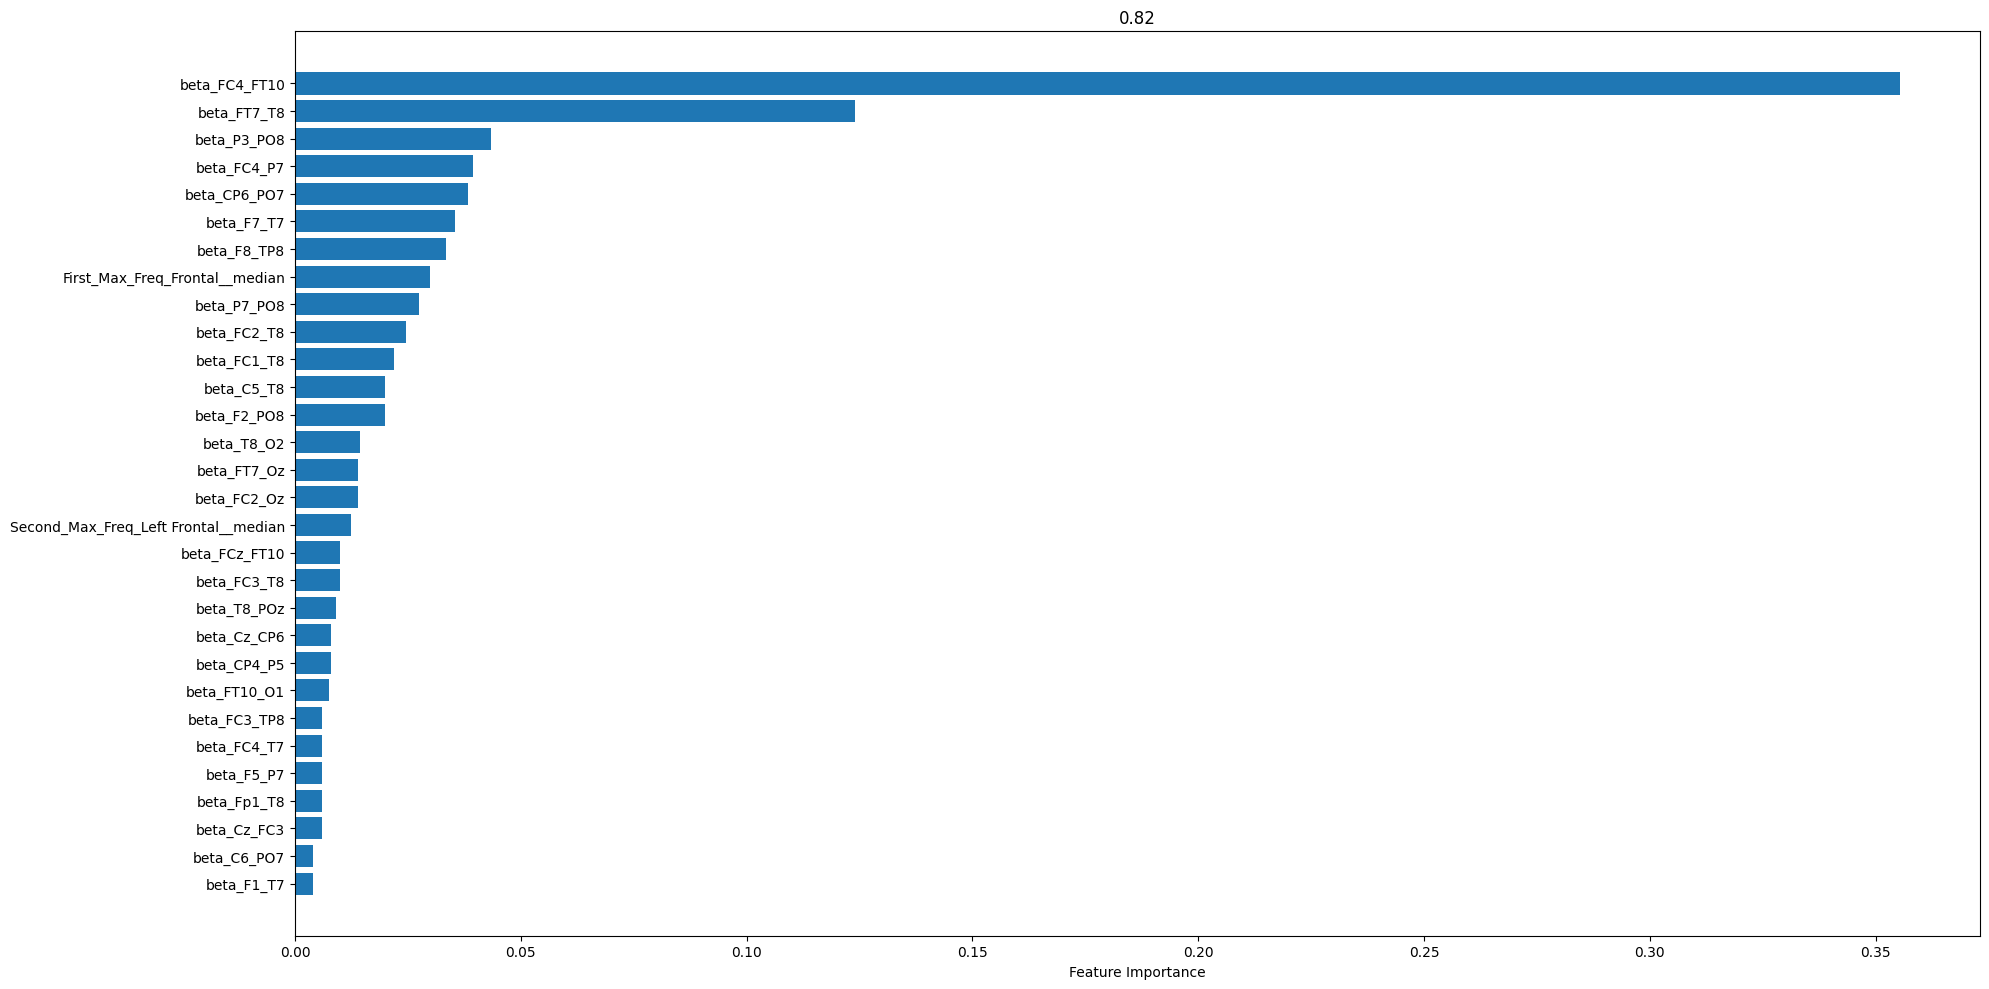

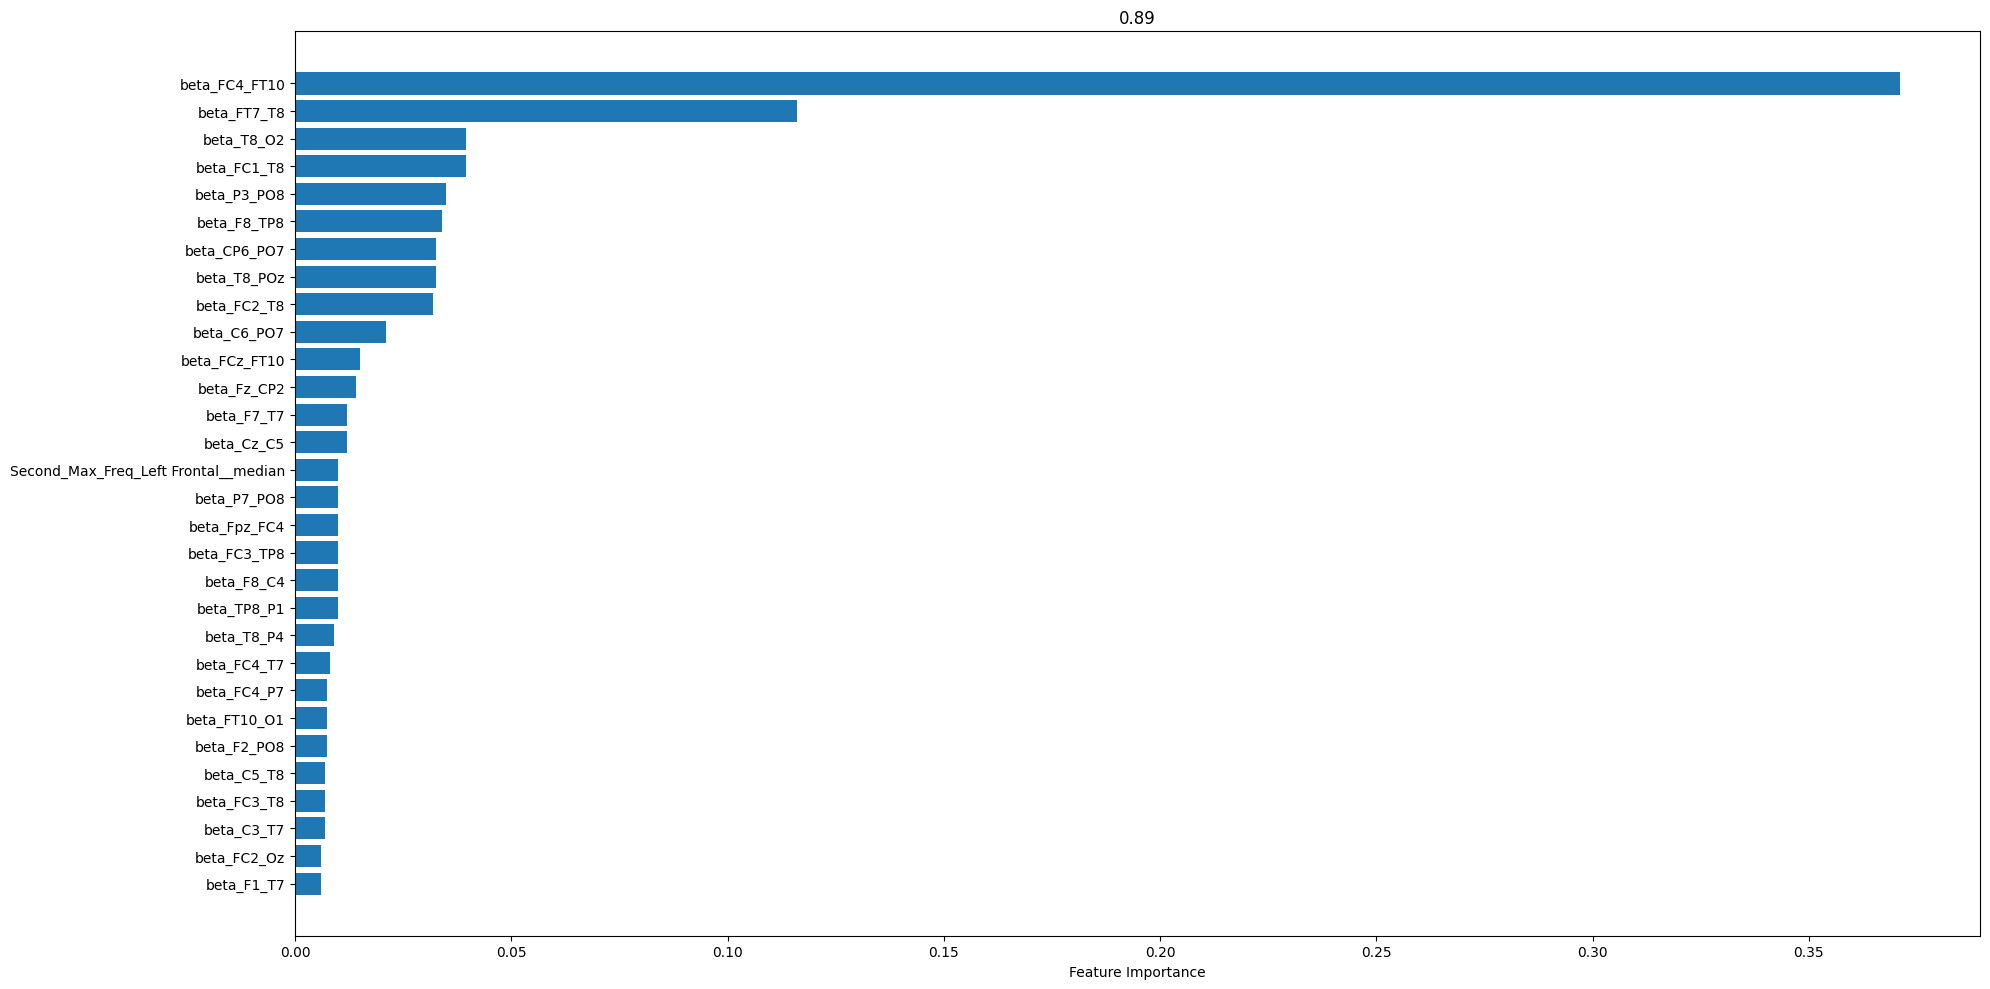

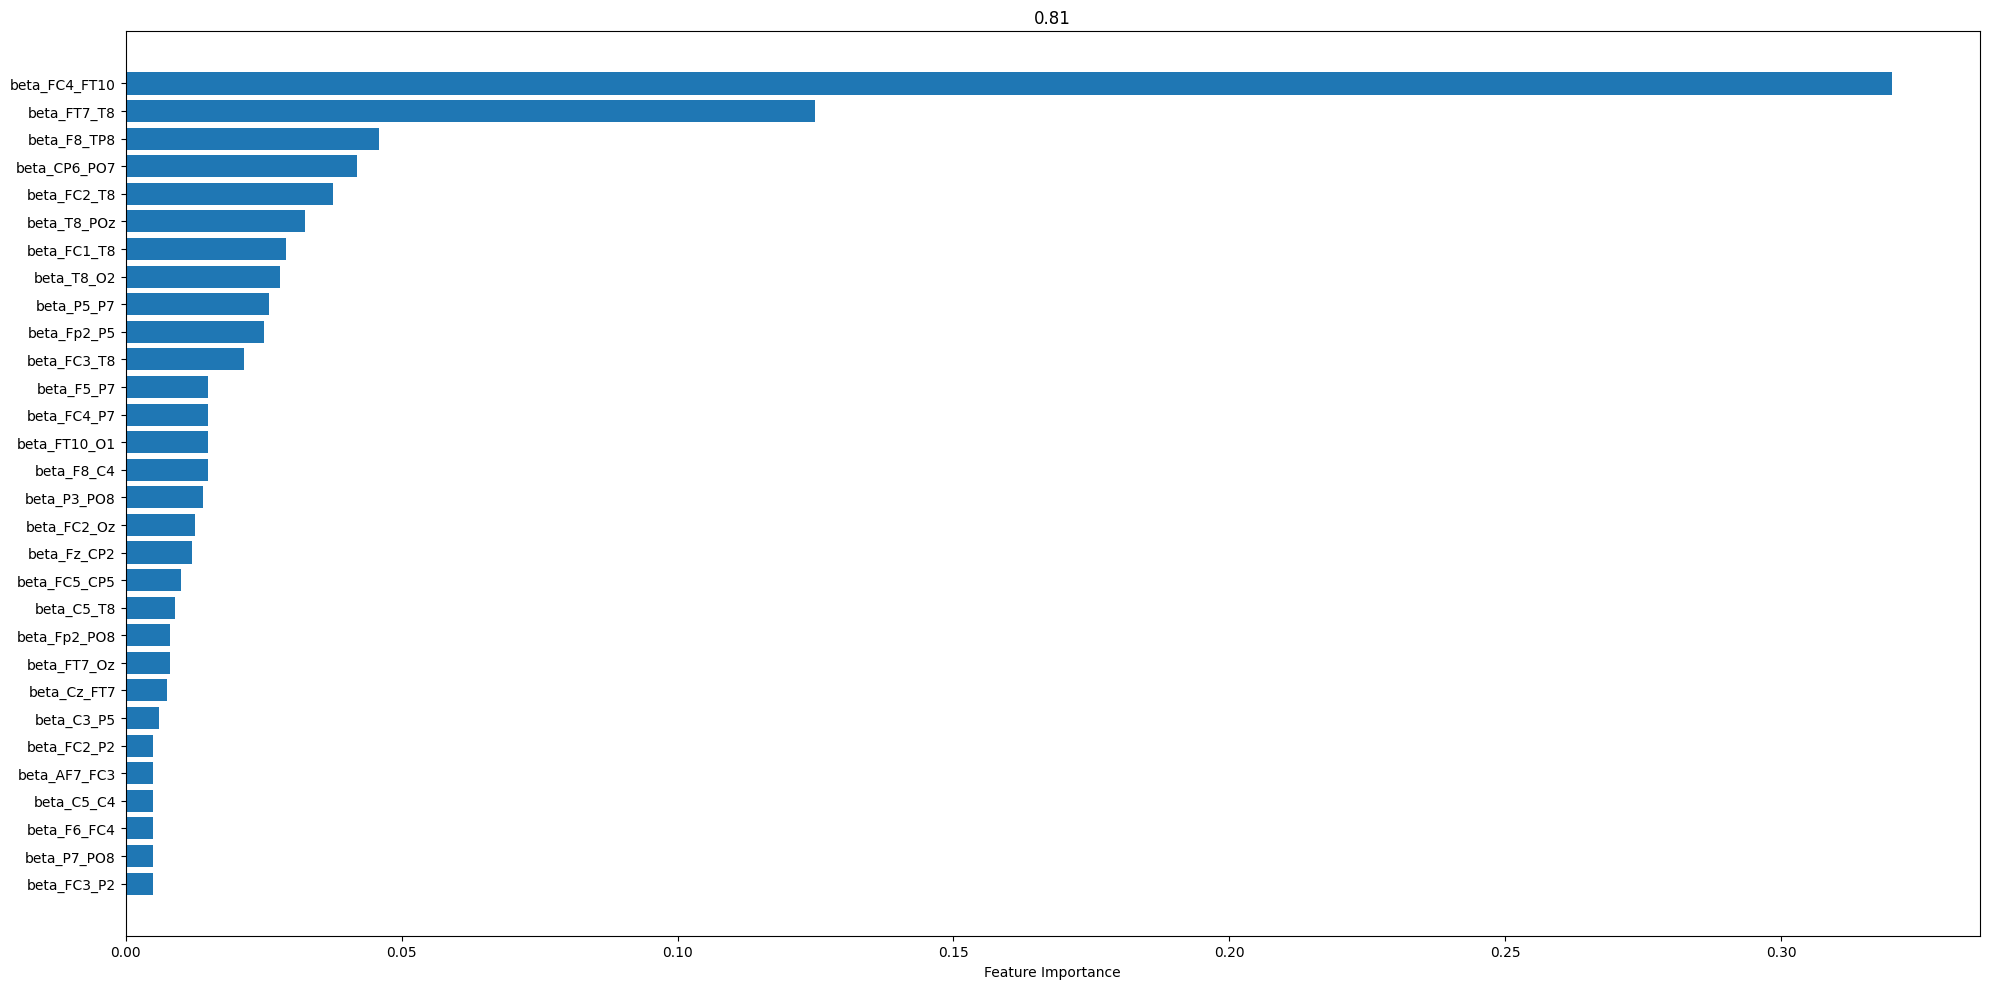

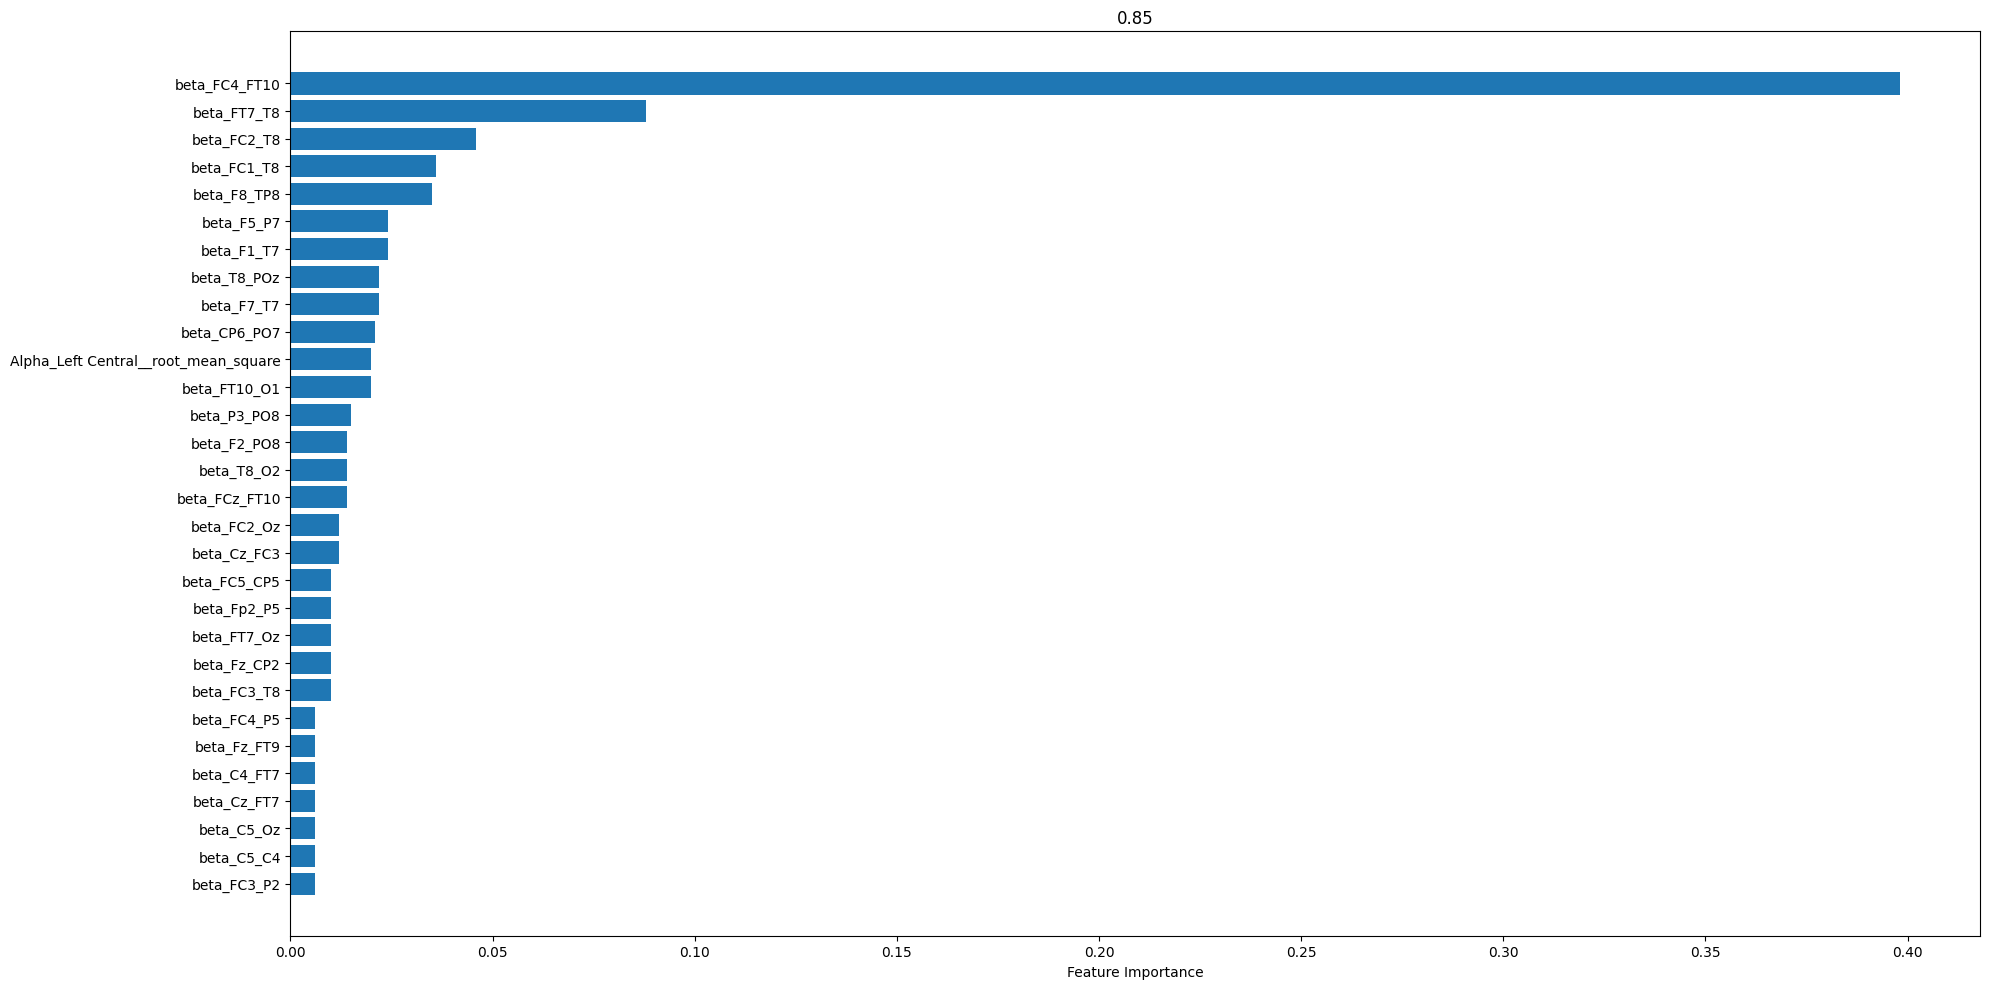

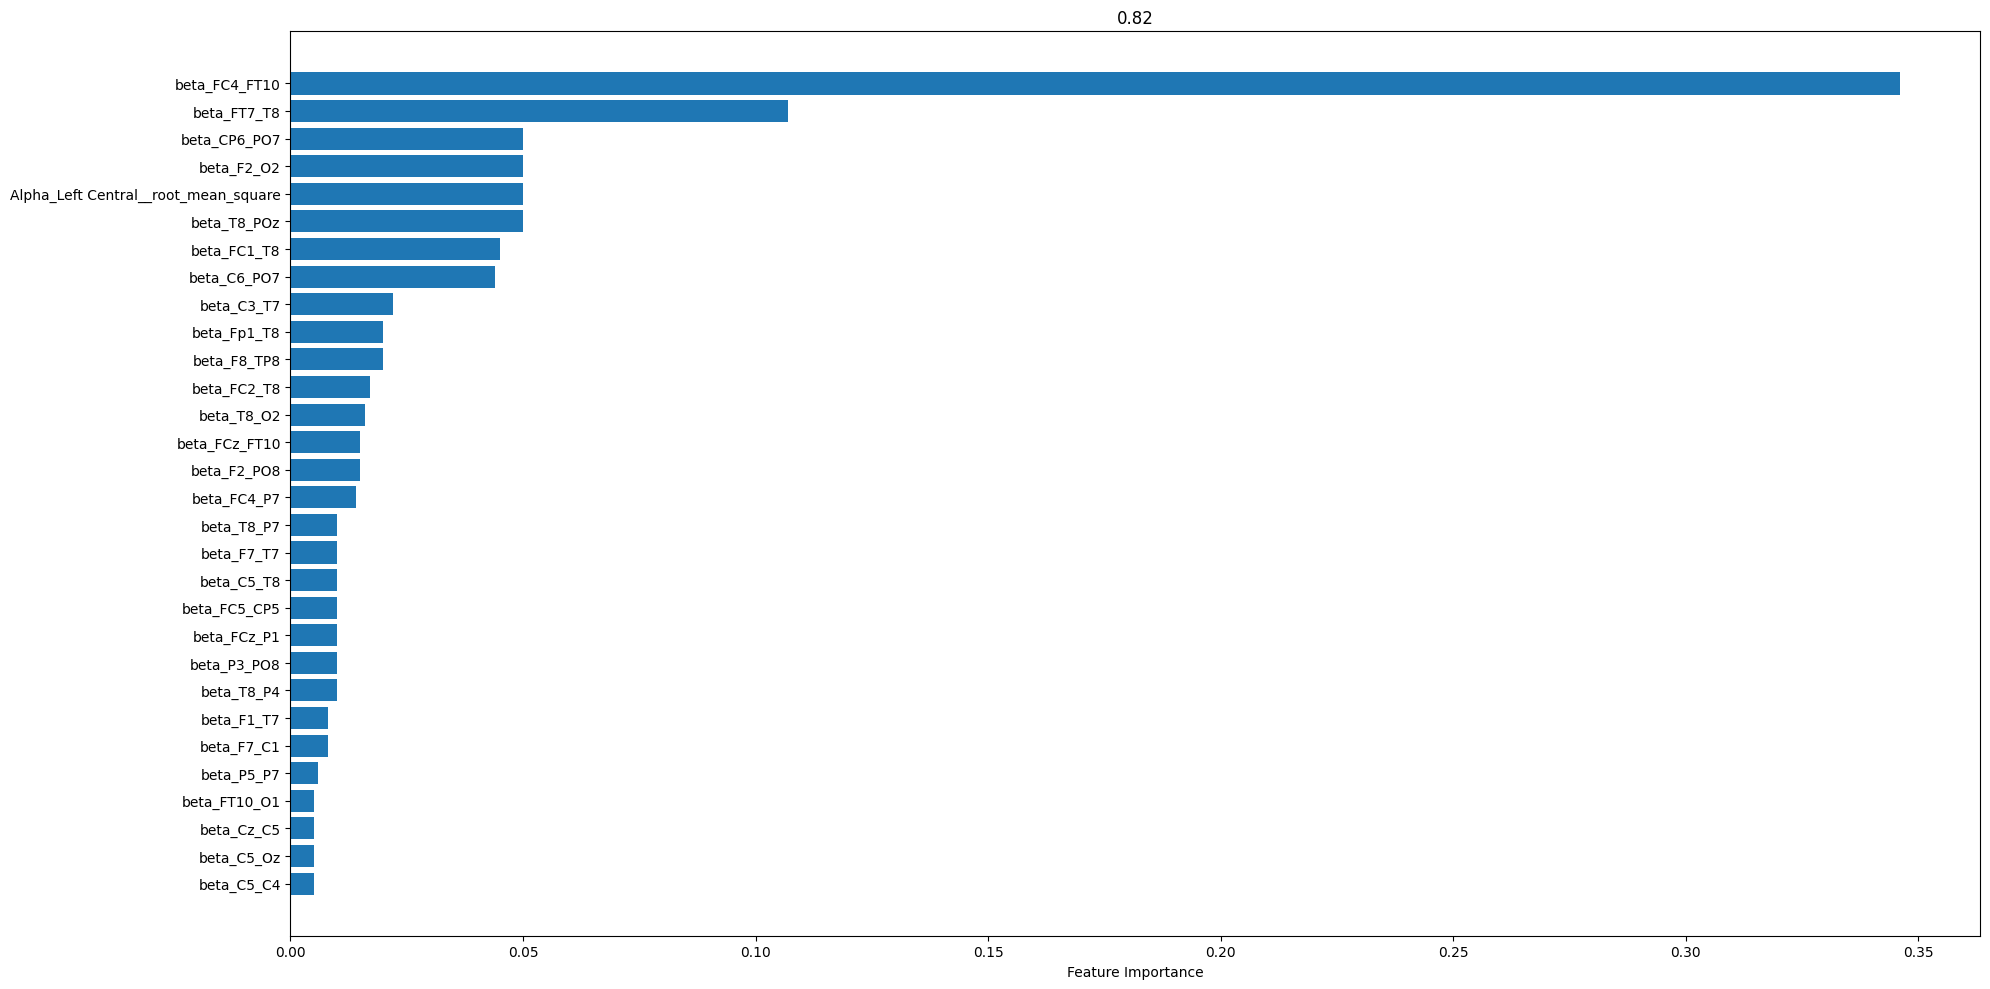

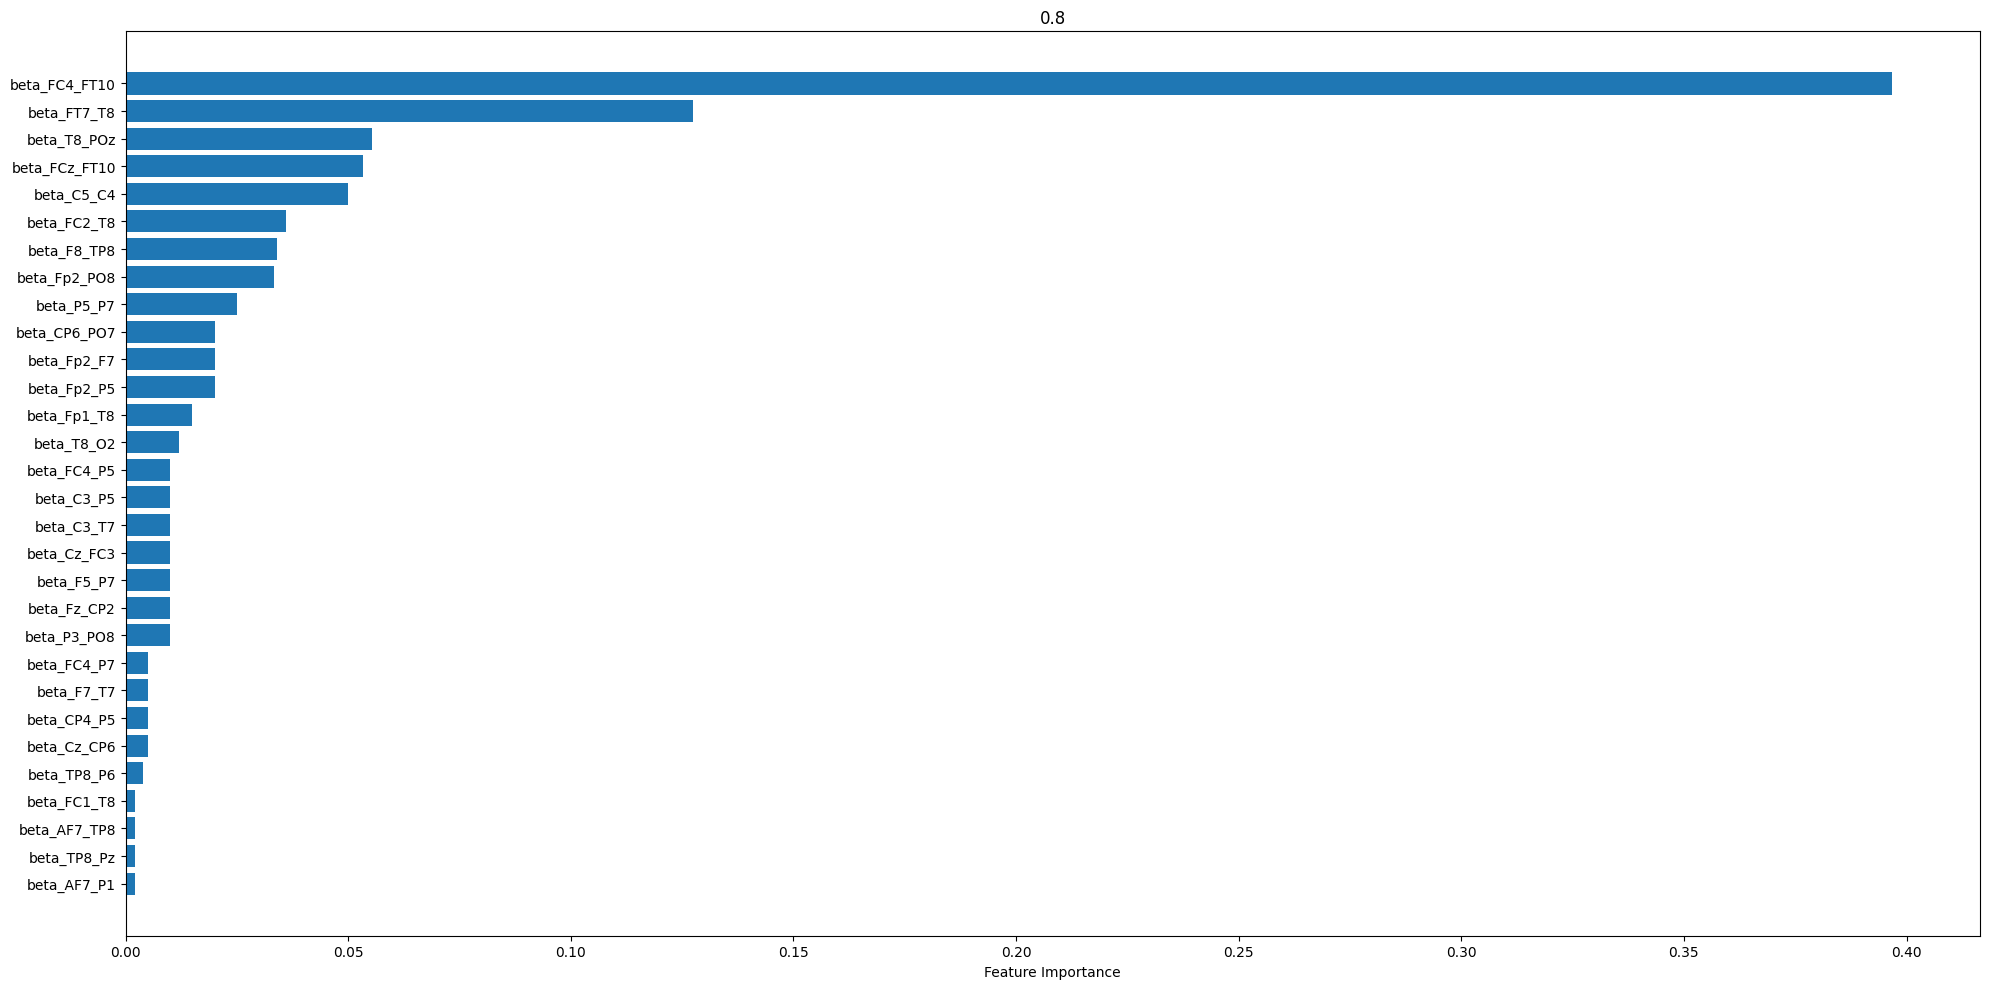

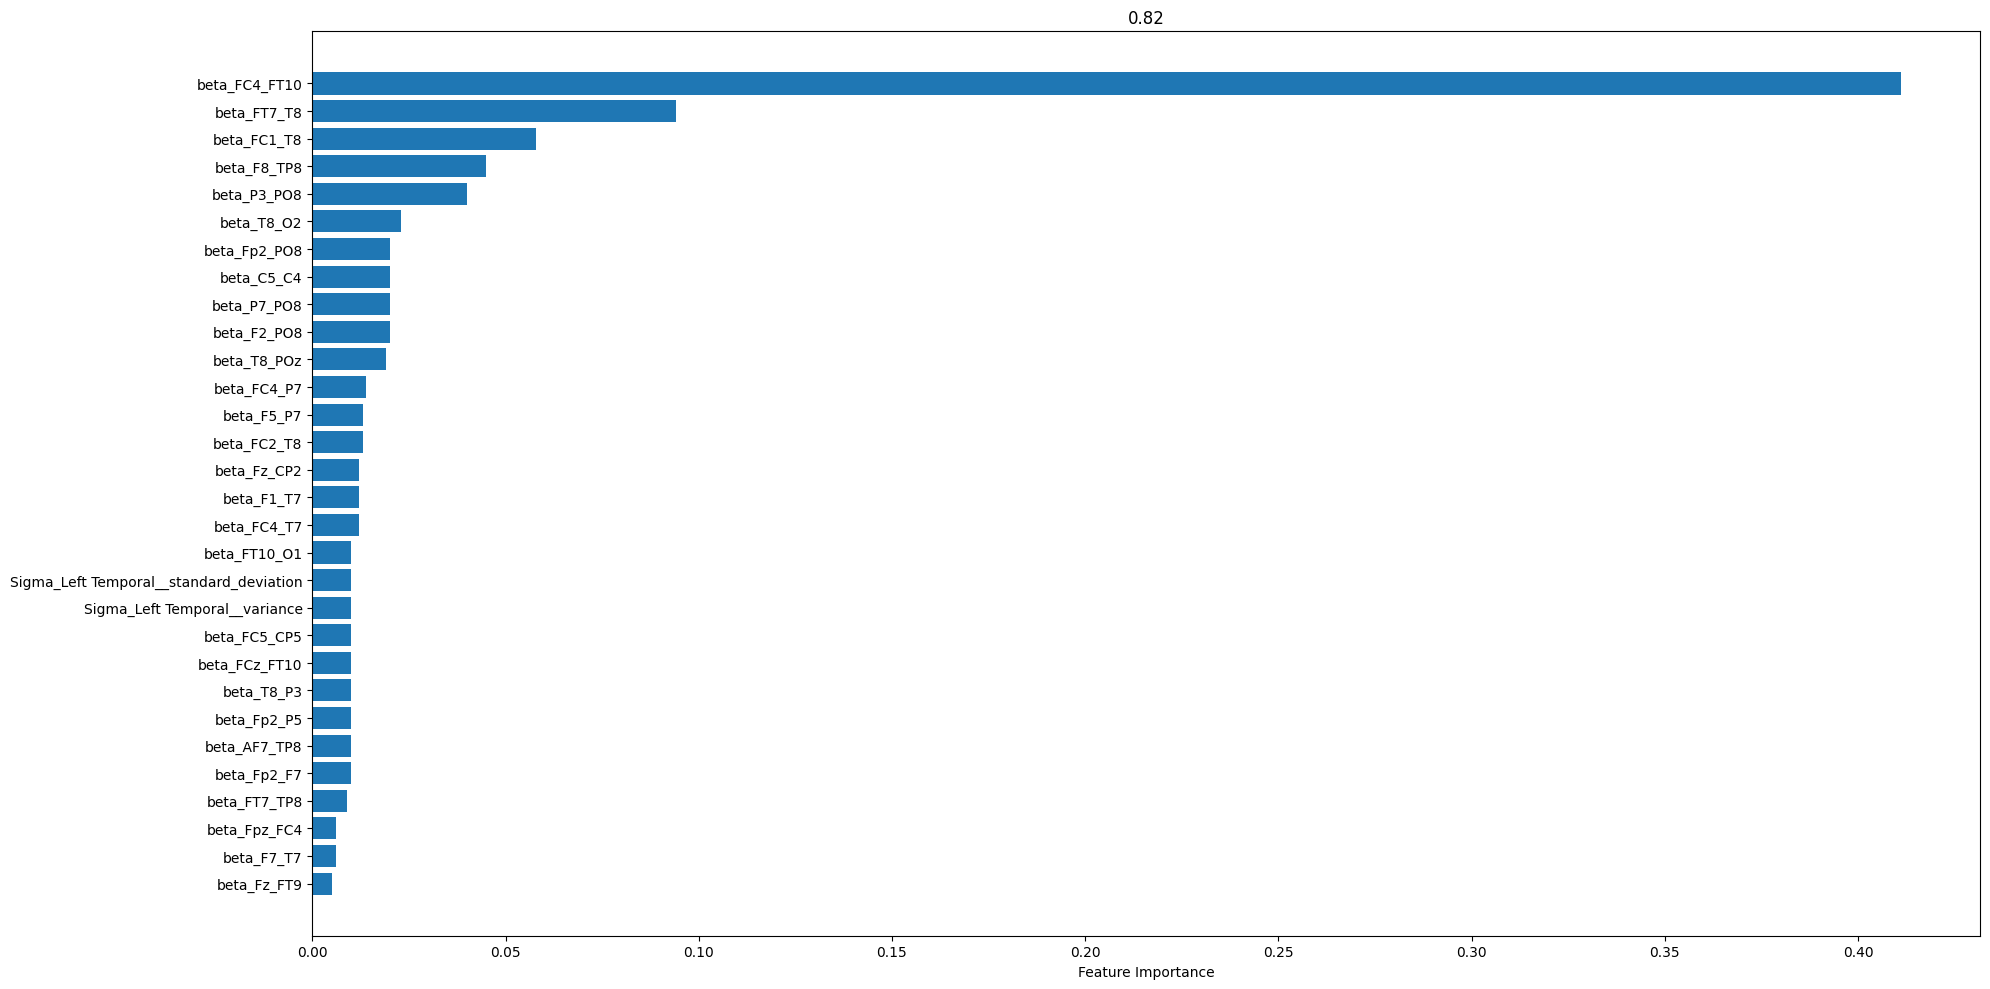

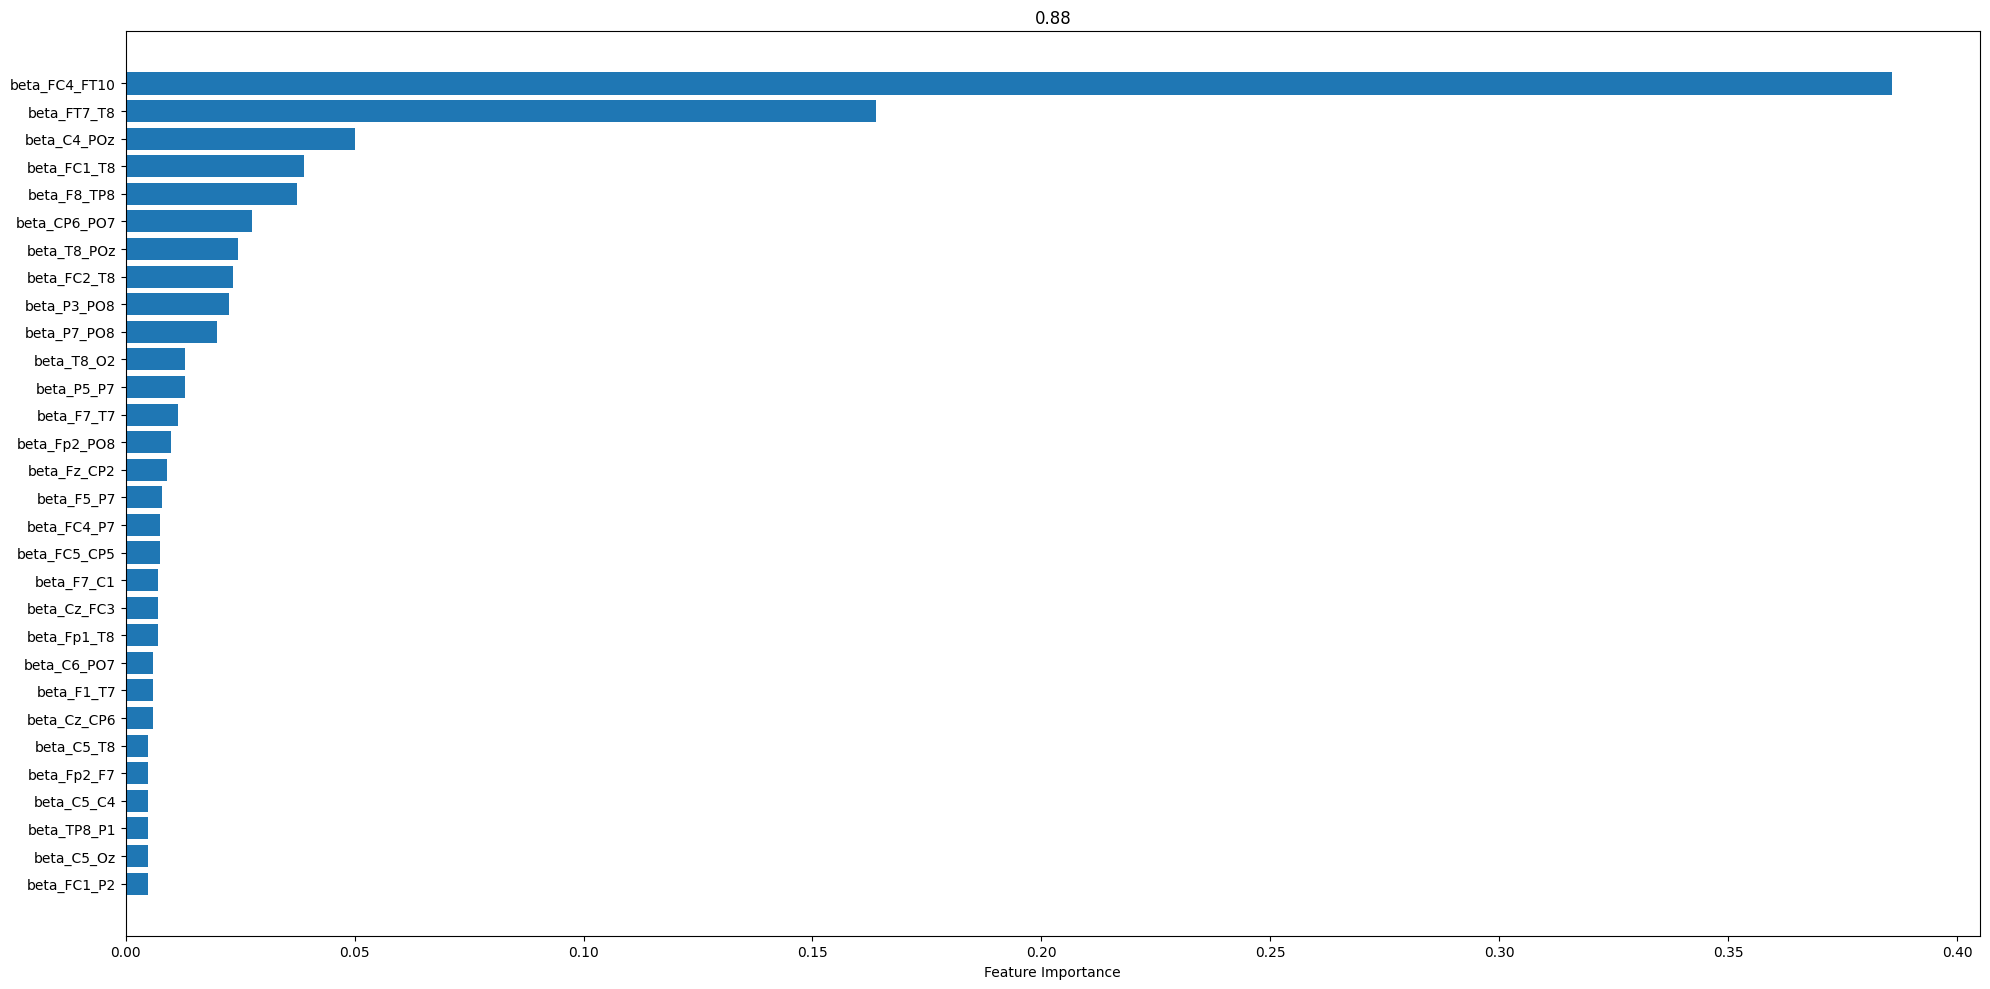

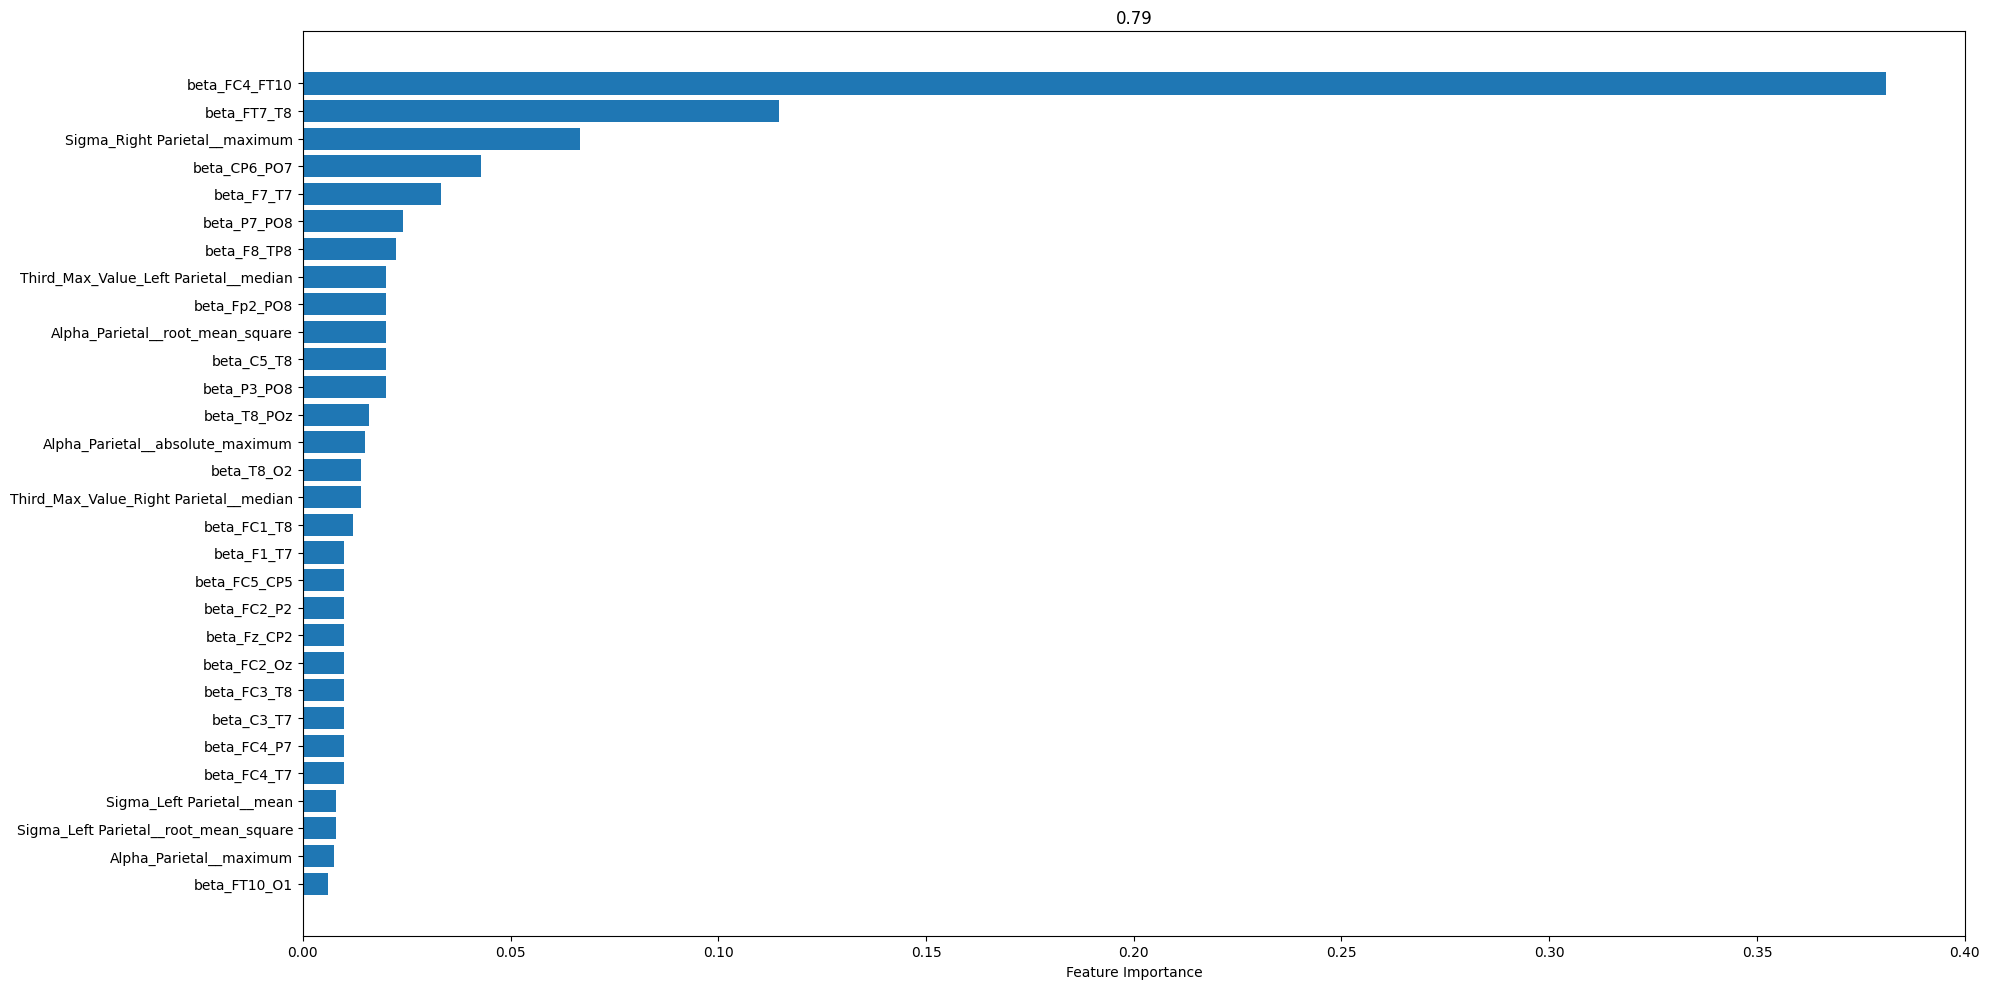

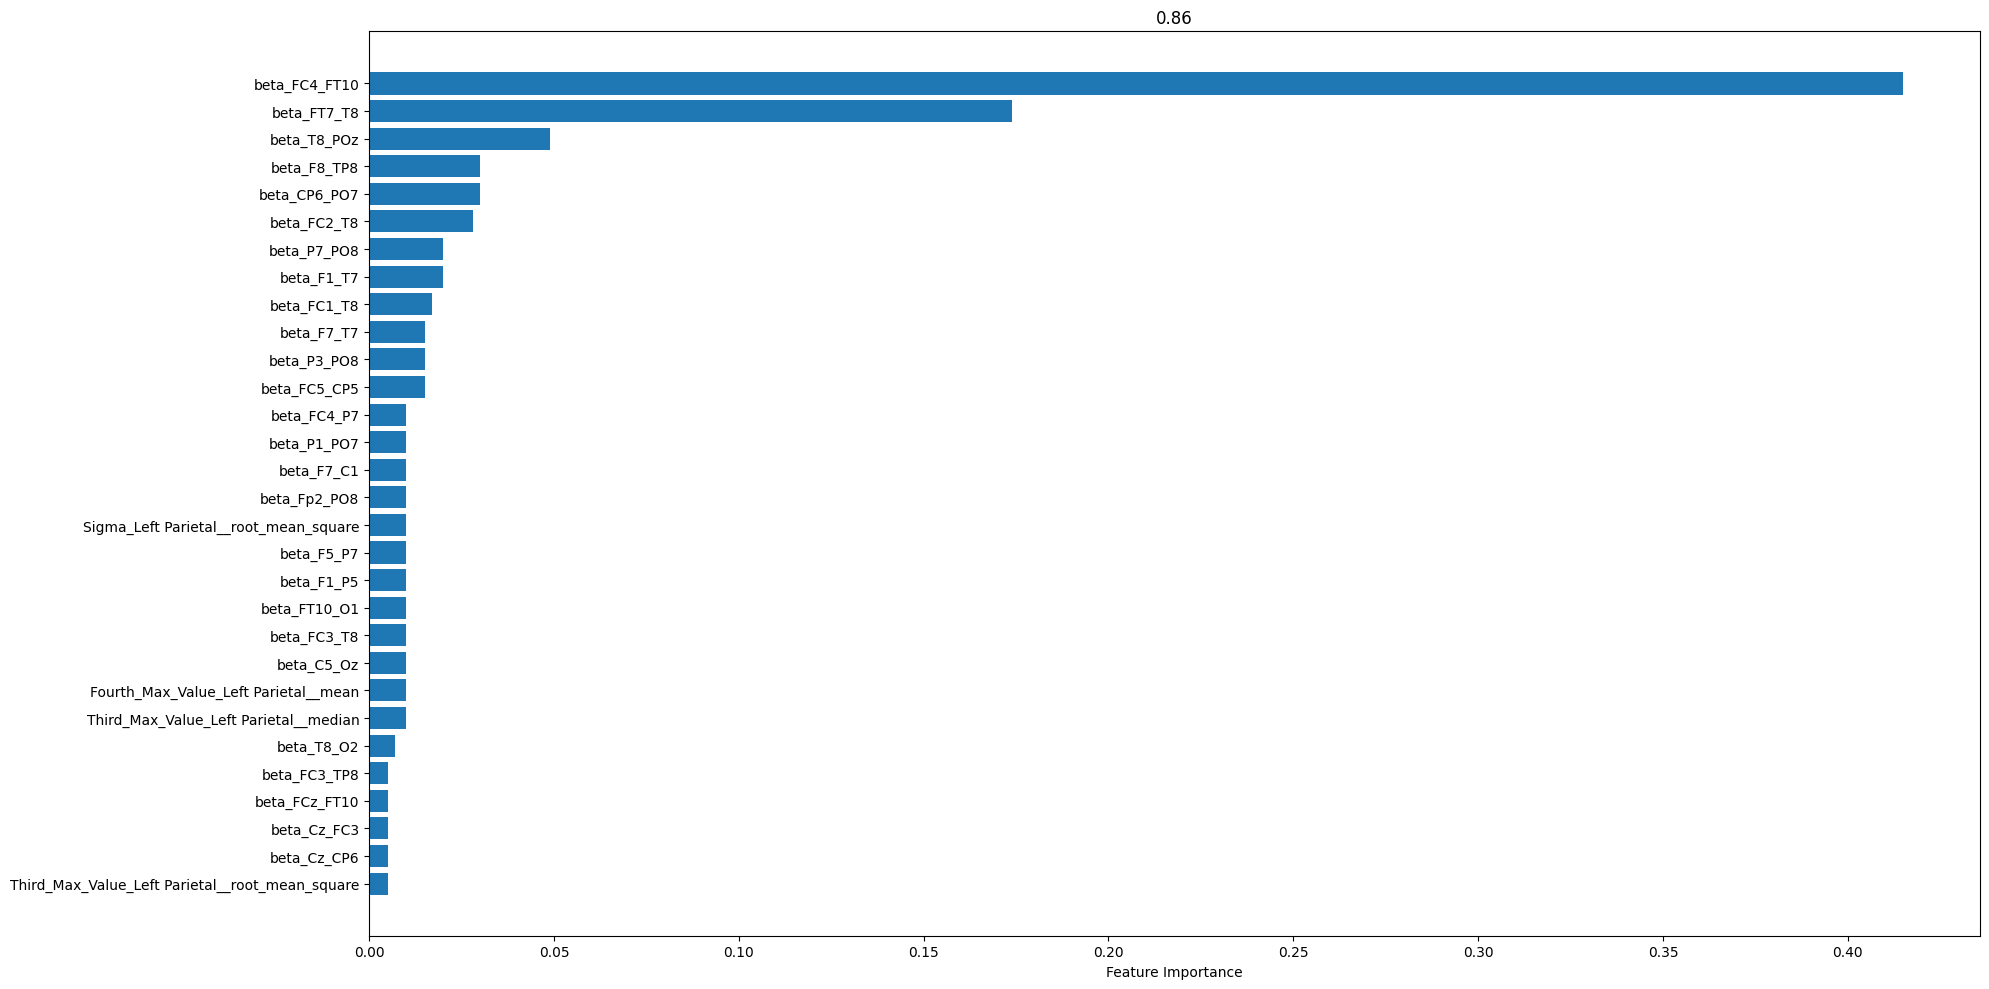

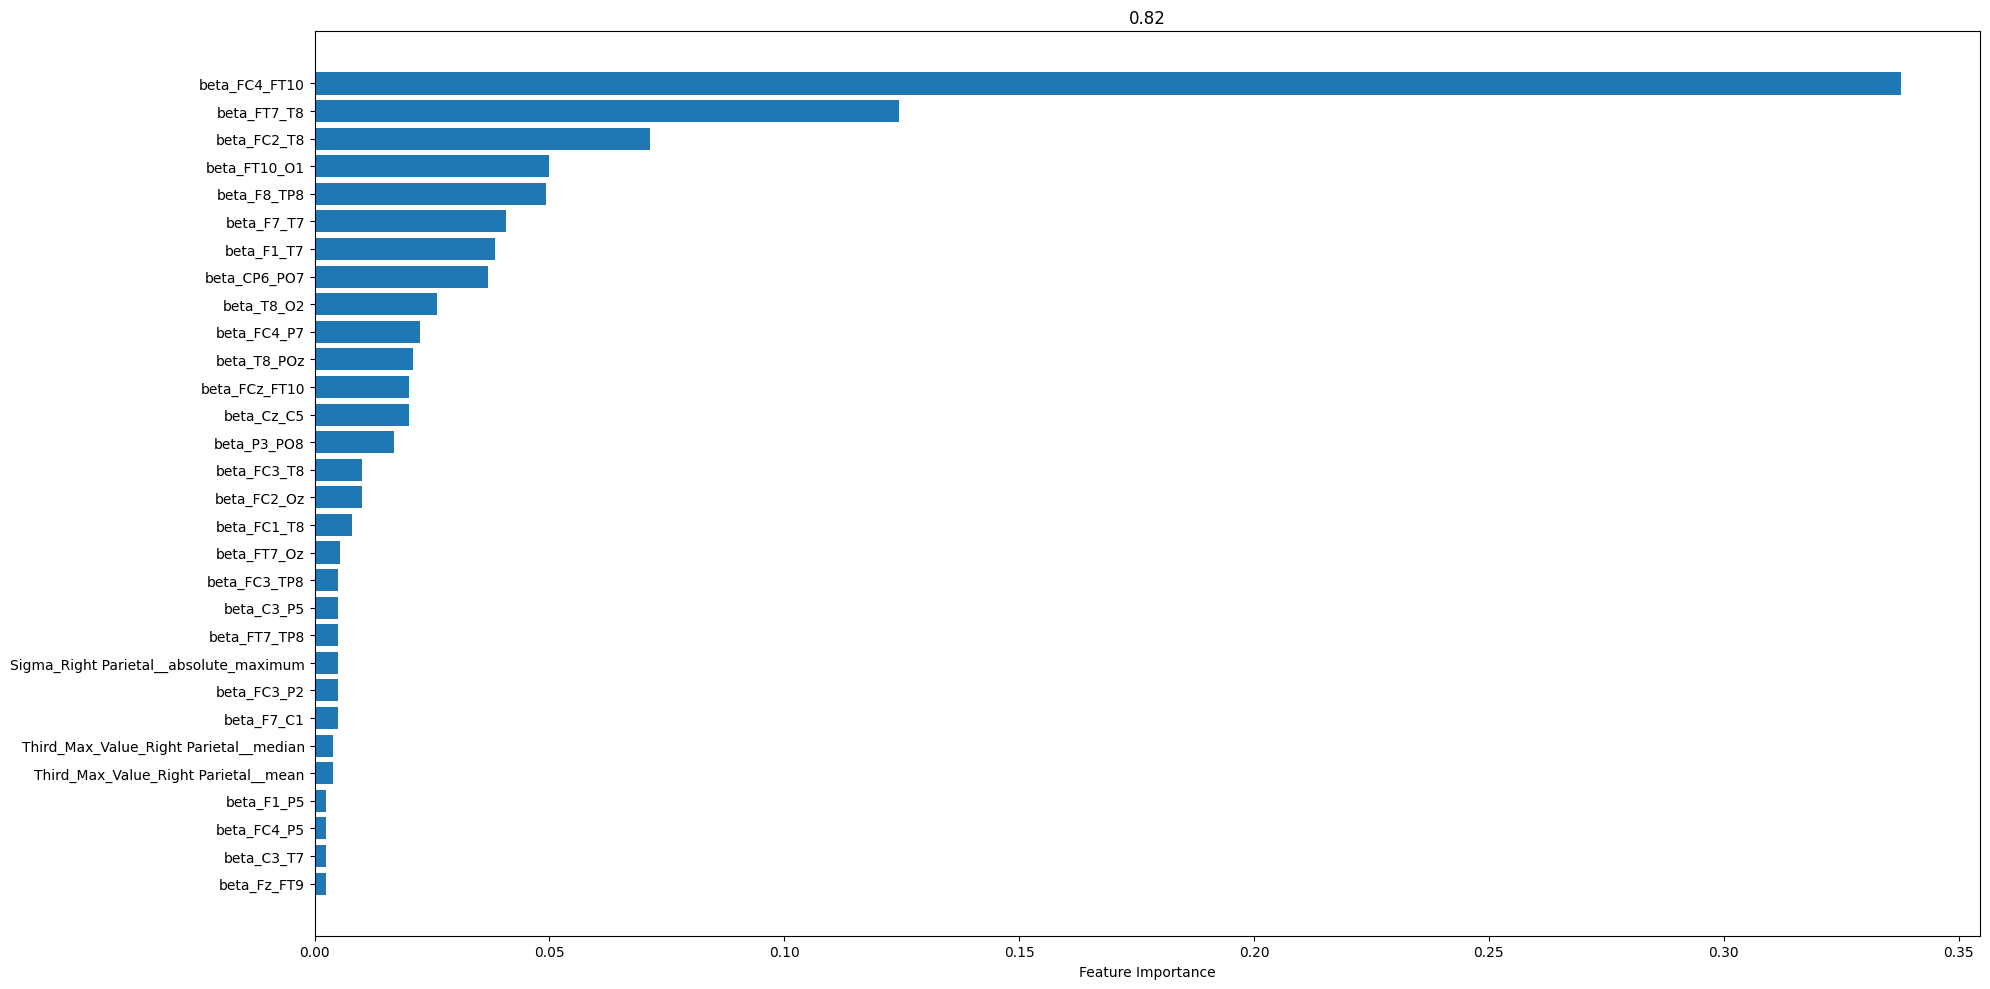

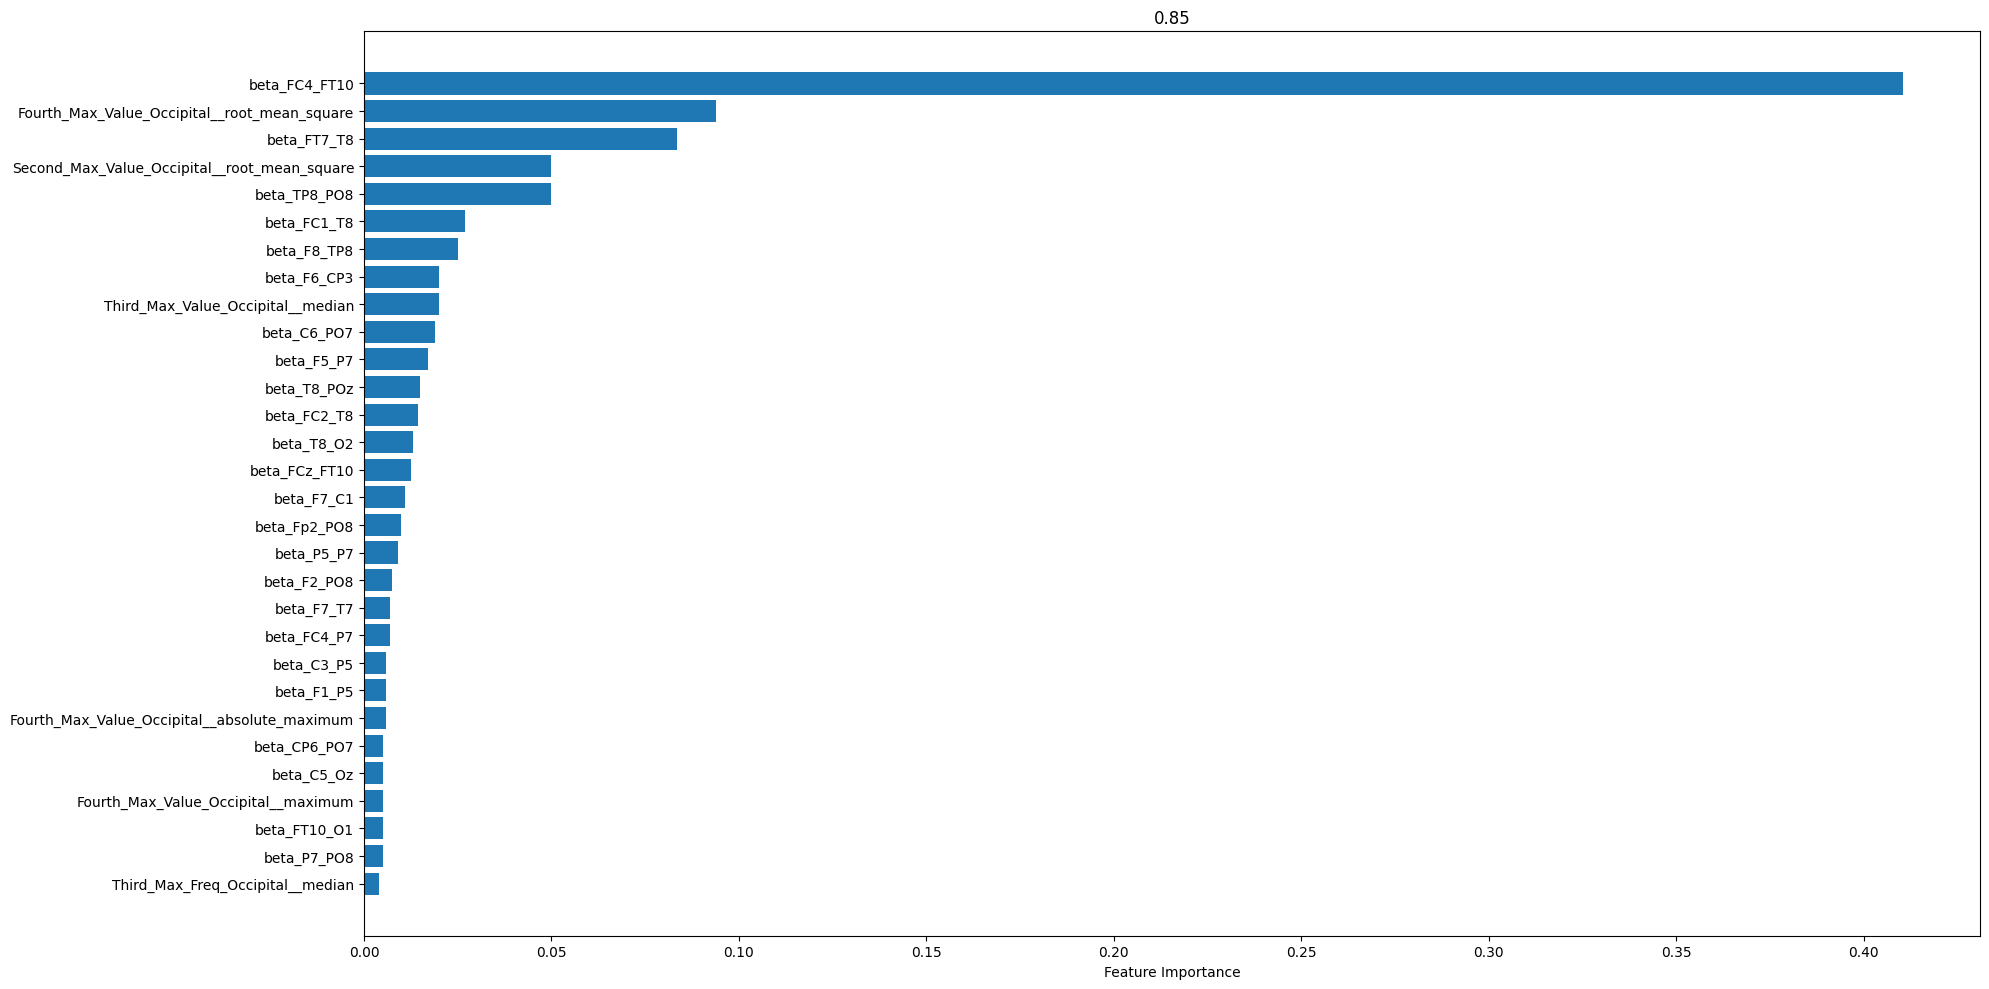

In [59]:
region = 'Right Temporal'
for i, region in enumerate(regions):
    feature_importances = []
    for clf in (tuned_clfs_dicts_loaded['N1' + str(1) + 'Ada'][region + '_Ada'][0] + tuned_clfs_dicts_loaded['N1' + str(1) + 'Ada'][region + '_Ada'][1]):
        feature_importances.append(clf.best_estimator_.feature_importances_)
        
    feature_importances_arr = np.array(feature_importances)
    mean_importances = feature_importances_arr.mean(axis = 0)
    
    sorted_idx = mean_importances.argsort()
    
    feature_cols = data_dict['N1']['X'][data_dict['N1']['regional_features_dict'][region] ].columns 
    
    acc_val = np.array([0.81,0.82,0.89,0.81,0.85,0.82,0.8,0.82,0.88,0.79,0.86,0.82,0.85])[i]
    #Plot the feature importances graph
    plt.figure()
    plt.rcParams["figure.figsize"] = plt.rcParamsDefault["figure.figsize"]
    plt.rcParams["figure.figsize"] = (20,10)
    plt.title(str(acc_val))
    plt.barh(feature_cols[sorted_idx][-30:] , mean_importances[sorted_idx][-30:])
    plt.xlabel("Feature Importance")
    plt.tight_layout()

#### Dual Region Results

In [6]:
dual_regions = []
for i, region_1 in enumerate(regions):
        for region_2 in regions[i+1:]:
            region_combo = region_1 + '_' + region_2
            dual_regions.append(region_combo)

In [22]:
np.array(mean_accs_per_region).max()

0.675

#### Not Tuned

In [26]:
data_types = ['N1','REM', 'N2', 'N3', 'Wake']
expt_nums = [1,2]
models = ['DT','RF', 'Ada']

# models = ['DT', 'RF', 'Ada', 'SVC']
for data_type in data_types:
    for model in models:
        for expt_num in expt_nums:
            print(data_type + ' ' + model + ' expt_' + str(expt_num) )
            
            
            results_df = dual_region_results_dfs_loaded[data_type + str(expt_num) + model]
            
            
            mean_accs_per_region = []
            fold_accs_per_region = {}
            
            clf_name = model
            for region in dual_regions:
                try:
                    y_preds = results_df[region+ '_' + clf_name + '_y_preds'][0] + results_df[region+ '_' + clf_name + '_y_preds'][1]
                    y_true = results_df['y_true'][0] + results_df['y_true'][1]
                    acc_scores= [accuracy_score(y_preds, y_true) for y_preds, y_true in zip(y_preds,y_true)]
                
                    fold_accs_per_region[region] = acc_scores
                    
                    mean_accs_per_region.append( np.array(acc_scores).mean() )
                except: 
                    #Some regions not done for tuned RF (took ages, decide to focus on ADA and DT)
                    pass
            
            mean_accs_per_region
            print(np.array(mean_accs_per_region))  
            print(np.array(mean_accs_per_region).max())
            print(np.array(mean_accs_per_region).mean())

N1 DT expt_1
[0.81 0.76 0.78 0.78 0.76 0.76 0.78 0.76 0.78 0.79 0.76 0.79 0.85 0.8
 0.79 0.86 0.86 0.8  0.86 0.76 0.82 0.86 0.86 0.78 0.78 0.76 0.76 0.78
 0.76 0.78 0.76 0.76 0.76 0.86 0.84 0.84 0.76 0.84 0.85 0.85 0.85 0.85
 0.78 0.78 0.82 0.78 0.86 0.76 0.78 0.76 0.76 0.78 0.76 0.76 0.76 0.76
 0.76 0.78 0.76 0.76 0.76 0.76 0.76 0.84 0.85 0.85 0.85 0.85 0.76 0.76
 0.76 0.76 0.76 0.78 0.76 0.76 0.79 0.76]
0.8625
0.7923076923076925
N1 DT expt_2
[0.69 0.68 0.66 0.59 0.69 0.69 0.7  0.7  0.69 0.67 0.68 0.73 0.68 0.65
 0.59 0.69 0.68 0.68 0.74 0.68 0.76 0.68 0.83 0.66 0.57 0.69 0.67 0.69
 0.67 0.7  0.69 0.7  0.79 0.6  0.61 0.65 0.72 0.67 0.72 0.69 0.7  0.83
 0.64 0.63 0.69 0.67 0.67 0.72 0.62 0.82 0.66 0.73 0.68 0.71 0.72 0.66
 0.78 0.72 0.67 0.71 0.68 0.62 0.75 0.65 0.75 0.72 0.73 0.83 0.7  0.71
 0.69 0.8  0.72 0.69 0.87 0.67 0.78 0.75]
0.8722222222222221
0.6985754985754985
N1 RF expt_1
[0.75 0.76 0.76 0.81 0.76 0.76 0.76 0.76 0.79 0.76 0.76 0.76 0.75 0.79
 0.78 0.75 0.75 0.79 0.76 0.78 0.

#### Tuned Dual Region Results

In [ ]:
tuned_dual_region_results_dfs_loaded

In [10]:
data_types = ['N1','REM', 'N2', 'N3', 'Wake']
expt_nums = [1,2]
r_state = 2
models = ['DT','Ada']

# models = ['DT', 'RF', 'Ada', 'SVC']
for data_type in data_types:
    for model in models:
        for expt_num in expt_nums:
            print(data_type + ' ' + model + ' expt_' + str(expt_num) )
            
            
            results_df = tuned_dual_region_results_dfs_loaded[data_type + str(expt_num) + model+ str(r_state)]
            
            
            mean_accs_per_region = []
            fold_accs_per_region = {}
            
            clf_name = model
            for region in dual_regions:
                try:
                    y_preds = results_df[region+ '_' + clf_name + '_y_preds'][0] 
                    # + results_df[region+ '_' + clf_name + '_y_preds'][1]
                    y_true = results_df['y_true'][0] 
                    # + results_df['y_true'][1]
                    acc_scores= [accuracy_score(y_preds, y_true) for y_preds, y_true in zip(y_preds,y_true)]
                
                    fold_accs_per_region[region] = acc_scores
                    
                    mean_accs_per_region.append( np.array(acc_scores).mean() )
                except: 
                    #Some regions not done for tuned RF (took ages, decide to focus on ADA and DT)
                    pass
            
            mean_accs_per_region
            print(np.array(mean_accs_per_region))  
            print(np.array(mean_accs_per_region).max())
            print(np.array(mean_accs_per_region).mean())

N1 DT expt_1
[0.72 0.75 0.68 0.78 0.7  0.75 0.82 0.82 0.72 0.8  0.7  0.8  0.82 0.8
 0.72 0.85 0.75 0.78 0.75 0.72 0.78 0.78 0.82 0.85 0.82 0.8  0.85 0.72
 0.72 0.82 0.78 0.78 0.8  0.78 0.8  0.8  0.72 0.72 0.65 0.75 0.8  0.82
 0.7  0.78 0.72 0.72 0.82 0.75 0.78 0.85 0.72 0.85 0.75 0.75 0.8  0.8
 0.75 0.8  0.78 0.78 0.75 0.85 0.82 0.75 0.72 0.75 0.8  0.82 0.75 0.78
 0.75 0.8  0.68 0.85 0.88 0.68 0.8  0.65]
0.875
0.7717948717948716
N1 DT expt_2
[0.64 0.69 0.66 0.62 0.68 0.75 0.71 0.69 0.68 0.73 0.6  0.74 0.64 0.73
 0.59 0.64 0.83 0.83 0.73 0.66 0.79 0.59 0.79 0.79 0.64 0.66 0.75 0.69
 0.81 0.73 0.69 0.72 0.75 0.54 0.77 0.79 0.74 0.73 0.75 0.69 0.58 0.74
 0.6  0.68 0.68 0.72 0.68 0.66 0.65 0.63 0.71 0.66 0.81 0.75 0.71 0.62
 0.77 0.62 0.79 0.72 0.66 0.72 0.74 0.77 0.68 0.73 0.72 0.83 0.66 0.77
 0.74 0.76 0.68 0.72 0.83 0.57 0.83 0.81]
0.8311111111111111
0.7083190883190883
N1 Ada expt_1
[0.85 0.82 0.82 0.8  0.8  0.82 0.85 0.85 0.82 0.82 0.82 0.85 0.82 0.75
 0.85 0.8  0.88 0.88 0.85 0.82 0.8